In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
sns.set_style("darkgrid")
sns.set(style="ticks", color_codes=True)

In [4]:

data = pd.read_csv("input_bcell.csv")
data.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [5]:
data["target"].value_counts()

0    10485
1     3902
Name: target, dtype: int64

In [6]:
data.describe()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
count,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000
mean,297.675818,308.085077,0.994706,1.059788,1.021188,1.767137,7.067472,0.075727,-0.406097,43.703902,0.271217
std,353.741450,353.733297,0.124772,1.621931,0.053804,1.968985,1.888708,0.025767,0.394618,16.682362,0.444603
min,1.000000,6.000000,0.534000,0.000000,0.838000,-9.029000,3.686096,0.000000,-1.971171,5.448936,0.000000
25%,84.000000,95.000000,0.911000,0.248000,0.986000,0.600000,5.621033,0.060606,-0.606215,31.614529,0.000000
50%,191.000000,200.000000,0.990000,0.556000,1.020000,1.793000,6.499573,0.074534,-0.330540,42.287268,0.000000
75%,382.000000,393.000000,1.074000,1.209000,1.055000,3.009500,8.676575,0.091312,-0.189591,49.101172,1.000000
max,3079.000000,3086.000000,1.546000,27.189000,1.255000,9.120000,12.232727,0.182254,1.267089,137.046667,1.000000


In [7]:
columns = []
for cols in data.columns:
    #print(type(data[cols][0]))
    if type(data[cols][0])  is not str:
        columns.append(cols)
        print(type(data[cols][0]))

#columns

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>


In [8]:
data = data[columns]
data.shape

(14387, 11)

In [9]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler()
scaled_data = scaled_data.fit(data)
scaled_data = scaled_data.transform(data)

In [10]:
scaled_data.shape

(14387, 11)

<AxesSubplot:>

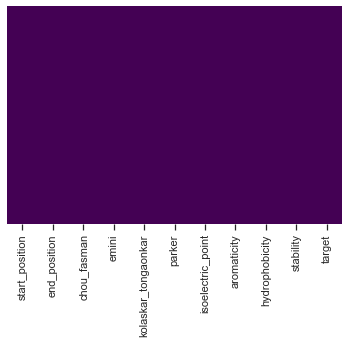

In [24]:
sns.heatmap(data.isnull(), cmap="viridis", yticklabels=False, cbar = False, square = False)


In [12]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


In [13]:
#new_data = pd.DataFrame(scaled_data, columns = columns)

X = data[data.columns[:-1]]
y = data[data.columns[-1]]

print(data.head())
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.33,shuffle = True)

   start_position  end_position  chou_fasman  emini  kolaskar_tongaonkar  \
0             161           165        1.016  0.703                1.018   
1             251           255        0.770  0.179                1.199   
2             145           149        0.852  3.427                0.960   
3             152           156        1.410  2.548                0.936   
4              85            89        1.214  1.908                0.937   

   parker  isoelectric_point  aromaticity  hydrophobicity  stability  target  
0    2.22           5.810364     0.103275       -0.143829  40.273300       1  
1   -3.86           6.210876     0.065476       -0.036905  24.998512       1  
2    4.28           8.223938     0.091787        0.879227  27.863333       1  
3    6.32           4.237976     0.044776       -0.521393  30.765373       1  
4    4.64           6.867493     0.103846       -0.578846  21.684615       1  


In [14]:

model.fit(X_train, y_train)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(9639, 10) (9639,)
(4748, 10) (4748,)


c:\users\amanm\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:

predictions = model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))


[[3399   66]
 [1225   58]]


              precision    recall  f1-score   support

           0       0.74      0.98      0.84      3465
           1       0.47      0.05      0.08      1283

    accuracy                           0.73      4748
   macro avg       0.60      0.51      0.46      4748
weighted avg       0.66      0.73      0.64      4748



## Principal Component Analysis

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)
x_pca.shape

(14387, 2)

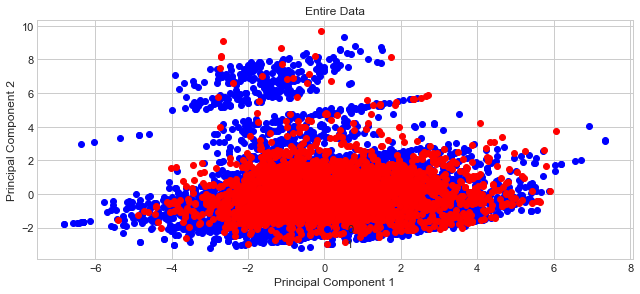

In [115]:
def plot_pca(y_sklearn, y, title, x_label='Principal Component 1', y_label = 'Principal Component 2'):
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(9, 4))
        for lab, col in zip((0,1), ('blue', 'red')):
            plt.scatter(y_sklearn[y==lab, 0],
                        y_sklearn[y==lab, 1],
                        label=lab,
                        c=col)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend(loc='lower center')
        plt.tight_layout()
        plt.title(title)
        plt.show()
plot_pca(x_pca, y,"Entire Data")

In [19]:
pca.components_

array([[-0.10128477, -0.1015249 ,  0.40583454,  0.324097  , -0.48861025,
         0.53079393,  0.11042028, -0.21070731, -0.30889519,  0.19041864,
         0.03075181],
       [ 0.58660217,  0.58688647,  0.16496842,  0.14663633, -0.16735371,
         0.14146991, -0.29507346,  0.29944285,  0.07211623, -0.18105417,
         0.00293993]])

In [20]:
new_data = pd.DataFrame(pca.components_, columns = data.columns)
new_data.shape

(2, 11)

<AxesSubplot:>

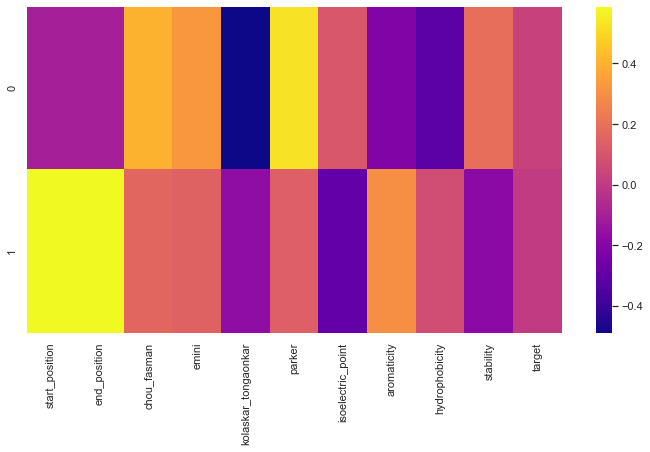

In [116]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.heatmap(new_data,cmap='plasma',)

In [22]:
new_data


,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,-0.101285,-0.101525,0.405835,0.324097,-0.488610,0.530794,0.110420,-0.210707,-0.308895,0.190419,0.030752
1,0.586602,0.586886,0.164968,0.146636,-0.167354,0.141470,-0.295073,0.299443,0.072116,-0.181054,0.002940


# K Nearest Neighbours

In [44]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,50):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_predictions = knn.predict(X_test)
    error_rate.append(np.mean(knn_predictions != y_test))

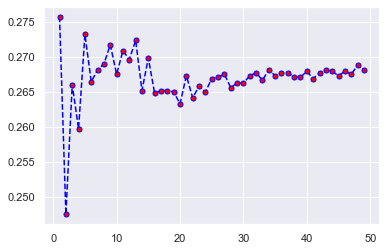

In [50]:
sns.set_style("darkgrid")
#sns.jointplot(range(1,50),error_rate)
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5, )

In [63]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)




In [65]:
print(confusion_matrix(y_test, knn_predictions))

print("\n")
print(classification_report(y_test, knn_predictions))


[[3286  179]
 [ 996  287]]


              precision    recall  f1-score   support

           0       0.77      0.95      0.85      3465
           1       0.62      0.22      0.33      1283

    accuracy                           0.75      4748
   macro avg       0.69      0.59      0.59      4748
weighted avg       0.73      0.75      0.71      4748




# Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

random_model = RandomForestClassifier(n_estimators = 600)


In [69]:
random_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [70]:
random_predictions = random_model.predict(X_test)

In [71]:
print(confusion_matrix(y_test, random_predictions))

print("\n")
print(classification_report(y_test, random_predictions))


[[3192  273]
 [ 417  866]]


              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3465
           1       0.76      0.67      0.72      1283

    accuracy                           0.85      4748
   macro avg       0.82      0.80      0.81      4748
weighted avg       0.85      0.85      0.85      4748



# Support Vector Machine

In [72]:
from sklearn.svm import SVC

In [87]:
svc_model = SVC(C = 1000 , gamma = 0.001)

In [78]:
param_grid = {"C":[0.1,1,10,100,1000], "gamma":[10,1,0.1,0.001,0.0001]}

In [80]:
from sklearn.model_selection import GridSearchCV

In [82]:
grid_search_model = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid_search_model.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. C=0.1, gamma=10, total=   9.3s
[CV] C=0.1, gamma=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s remaining:    0.0s


[CV] .................................. C=0.1, gamma=10, total=   9.3s
[CV] C=0.1, gamma=10 .................................................
[CV] .................................. C=0.1, gamma=10, total=   9.3s
[CV] C=0.1, gamma=10 .................................................
[CV] .................................. C=0.1, gamma=10, total=   9.3s
[CV] C=0.1, gamma=10 .................................................
[CV] .................................. C=0.1, gamma=10, total=   9.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   9.8s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   9.8s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   9.5s
[CV] C=0.1, gamma=1 ..................................................
[CV] .

[CV] .................................... C=10, gamma=1, total=  18.9s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=  13.1s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=  11.8s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=  11.8s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=  11.8s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=  11.7s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   6.4s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] .............................. C=1000, gamma=0.001, total=  36.9s
[CV] C=1000, gamma=0.001 .............................................
[CV] .............................. C=1000, gamma=0.001, total=  40.6s
[CV] C=1000, gamma=0.001 .............................................
[CV] .............................. C=1000, gamma=0.001, total=  41.7s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ............................. C=1000, gamma=0.0001, total=  36.9s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ............................. C=1000, gamma=0.0001, total=  32.3s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ............................. C=1000, gamma=0.0001, total=  30.7s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ............................. C=1000, gamma=0.0001, total=  35.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 30.5min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.001, 0.0001]},
             verbose=2)

In [85]:
grid_search_model.best_estimator_

#grid_search_predictions = grid_search_model.predict(y_test)

SVC(C=1000, gamma=0.001)

In [88]:
svc_model.fit(X_train, y_train)

SVC(C=1000, gamma=0.001)

In [89]:
svc_predictions = svc_model.predict(X_test)

In [101]:
print("Logistic Regression    : ", confusion_matrix(y_test, predictions))
print("Support Vector Machine : ",confusion_matrix(y_test, svc_predictions))
print("Random Forest          : ",confusion_matrix(y_test, random_predictions))
print("K Nearest Neigbiour    : ",confusion_matrix(y_test, knn_predictions))
print("\n")
print("Logistic Regression    : \n", classification_report(y_test, predictions))
print("Support Vector Machine :  \n",classification_report(y_test, svc_predictions))
print("Random Forest          :  \n",classification_report(y_test, random_predictions))
print("K Nearest Neigbiour    :  \n",classification_report(y_test, knn_predictions))



Logistic Regression    :  [[3399   66]
 [1225   58]]
Support Vector Machine :  [[3228  237]
 [ 862  421]]
Random Forest          :  [[3192  273]
 [ 417  866]]
K Nearest Neigbiour    :  [[3286  179]
 [ 996  287]]


Logistic Regression    : 
               precision    recall  f1-score   support

           0       0.74      0.98      0.84      3465
           1       0.47      0.05      0.08      1283

    accuracy                           0.73      4748
   macro avg       0.60      0.51      0.46      4748
weighted avg       0.66      0.73      0.64      4748

Support Vector Machine :  
               precision    recall  f1-score   support

           0       0.79      0.93      0.85      3465
           1       0.64      0.33      0.43      1283

    accuracy                           0.77      4748
   macro avg       0.71      0.63      0.64      4748
weighted avg       0.75      0.77      0.74      4748

Random Forest          :  
               precision    recall  f1-score   sup